<a href="https://colab.research.google.com/github/virf96/Basico/blob/main/Comparacion_modelo_lineales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## LIBRERIAS

In [469]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_auc_score,accuracy_score,confusion_matrix
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy import stats
import missingno as msno
pd.set_option('display.max_columns',100)

## FUNCIONES

In [470]:
def metricas(y_true,y_pred):
    r2=r2_score(y_true,y_pred)
    mae=mean_absolute_error(y_true,y_pred)
    mse=mean_squared_error(y_true,y_pred)
    print(f'El r2 score es {r2}')
    print(f'El error cuadrático medio es {mse}')
    print(f'El error medio absoluto es {mae}')

In [471]:
def metricas2(model,Xv,yv): #Mide efectividad de un Modelo Predictivo
    print( " Roc Validate: %.3f" %roc_auc_score(y_score=model.predict_proba(Xv)[:,1],y_true=yv))
    print( " Acc Validate: %.3f" %accuracy_score(y_pred=model.predict(Xv),y_true=yv))
    print( " Matrix Conf Validate: ", "\n",confusion_matrix(y_pred=model.predict(Xv),y_true=yv))

# PREDICCION PRECIO CARRO - EJERCICIO 1 - REGRESION LINEAL

In [473]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [474]:
df=pd.read_csv('/content/drive/MyDrive/datasets/Fernando Villa - CarPrice_Assignment.csv')

In [475]:
df.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495.00
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500.00
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.50,171.20,65.50,52.40,2823,ohcv,six,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500.00
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.80,176.60,66.20,54.30,2337,ohc,four,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950.00
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.40,176.60,66.40,54.30,2824,ohc,five,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450.00


In [476]:
#Análicemos rapidamente la varianza de cada una de las variables para determinar cuáles no aportarían mucha información
pd.options.display.float_format = '{:.2f}'.format
df.var()

car_ID                 3519.17
symboling                 1.55
wheelbase                36.26
carlength               152.21
carwidth                  4.60
carheight                 5.97
curbweight           271107.87
enginesize             1734.11
boreratio                 0.07
stroke                    0.10
compressionratio         15.78
horsepower             1563.74
peakrpm              227515.30
citympg                  42.80
highwaympg               47.42
price              63821761.58
dtype: float64

In [477]:
#Dado que necesitamos convertir las variables categoricas en númericas para que pueda interactuar en la regresión, ocuparemos variables Dummy
data=pd.get_dummies(data=df,columns=['symboling','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem'])

In [478]:
data.head(5)

,car_ID,CarName,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,symboling_-2,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,alfa-romero giulia,88.60,168.80,64.10,48.80,2548,130,3.47,2.68,9.00,111,5000,21,27,13495.00,0,0,0,0,0,1,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,2,alfa-romero stelvio,88.60,168.80,64.10,48.80,2548,130,3.47,2.68,9.00,111,5000,21,27,16500.00,0,0,0,0,0,1,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,3,alfa-romero Quadrifoglio,94.50,171.20,65.50,52.40,2823,152,2.68,3.47,9.00,154,5000,19,26,16500.00,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,4,audi 100 ls,99.80,176.60,66.20,54.30,2337,109,3.19,3.40,10.00,102,5500,24,30,13950.00,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,5,audi 100ls,99.40,176.60,66.40,54.30,2824,136,3.19,3.40,8.00,115,5500,18,22,17450.00,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [479]:
#Veamos como cambio la varianza
data.var().sort_values()

fuelsystem_spfi                0.00
fuelsystem_mfi                 0.00
cylindernumber_three           0.00
cylindernumber_twelve          0.00
enginetype_dohcv               0.00
symboling_-2                   0.01
fuelsystem_4bbl                0.01
enginelocation_rear            0.01
enginelocation_front           0.01
enginetype_rotor               0.02
cylindernumber_two             0.02
cylindernumber_eight           0.02
carbody_convertible            0.03
carbody_hardtop                0.04
drivewheel_4wd                 0.04
fuelsystem_spdi                0.04
cylindernumber_five            0.05
fuelsystem_1bbl                0.05
enginetype_l                   0.06
enginetype_dohc                0.06
enginetype_ohcv                0.06
enginetype_ohcf                0.07
boreratio                      0.07
fueltype_gas                   0.09
fueltype_diesel                0.09
fuelsystem_idi                 0.09
symboling_-1                   0.10
stroke                      

In [480]:
data=data.drop(['CarName','car_ID','drivewheel_4wd','symboling_-2','fuelsystem_spdi','fuelsystem_4bbl',
           'enginelocation_rear','enginelocation_front','fuelsystem_1bbl','cylindernumber_five',
           'carbody_hardtop','carbody_convertible','cylindernumber_eight','cylindernumber_two',
           'enginetype_rotor','enginetype_dohcv','cylindernumber_twelve','cylindernumber_three',
           'fuelsystem_mfi','fuelsystem_spfi'],axis=1)

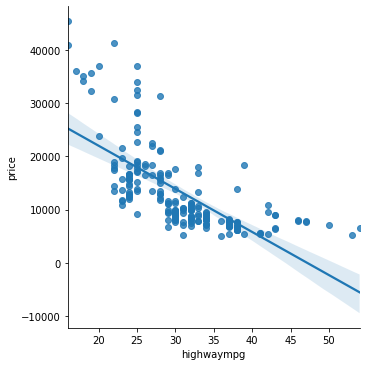

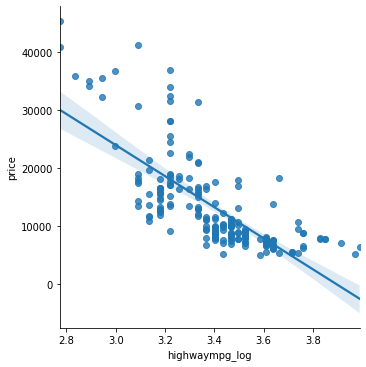

In [481]:
#Veamos como interactuan las variables que no son Dummy con el target, tal vez alguna transformación podría ayudarnos a mejorar el rendimiento
sns.lmplot(x='highwaympg',y='price',data=data,order=1)
data['highwaympg_log']=np.log(data['highwaympg'])
sns.lmplot(x='highwaympg_log',y='price',data=data,order=1)

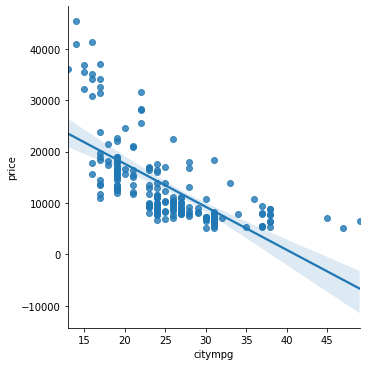

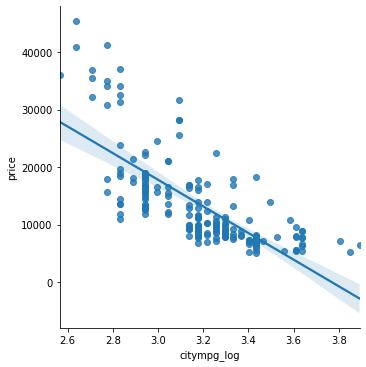

In [482]:
sns.lmplot(x='citympg',y='price',data=data,order=1)
data['citympg_log']=np.log(data['citympg'])
sns.lmplot(x='citympg_log',y='price',data=data,order=1)

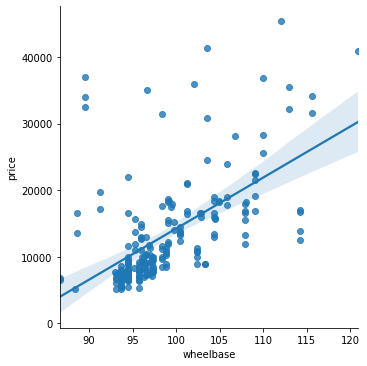

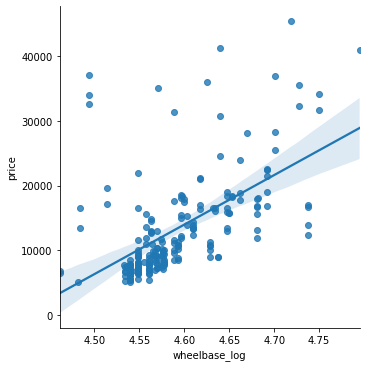

In [483]:
sns.lmplot(x='wheelbase',y='price',data=data,order=1)
data['wheelbase_log']=np.log(data['wheelbase'])
sns.lmplot(x='wheelbase_log',y='price',data=data,order=1)

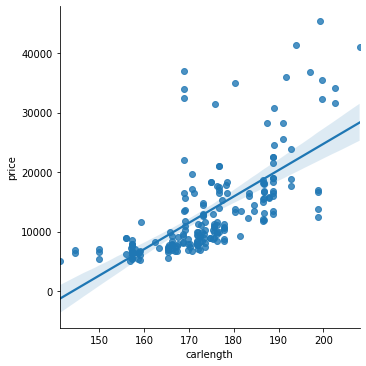

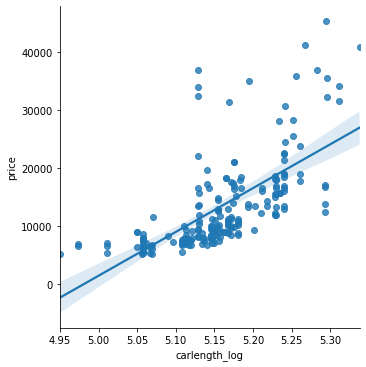

In [484]:
sns.lmplot(x='carlength',y='price',data=data,order=1)
data['carlength_log']=np.log(data['carlength'])
sns.lmplot(x='carlength_log',y='price',data=data,order=1)

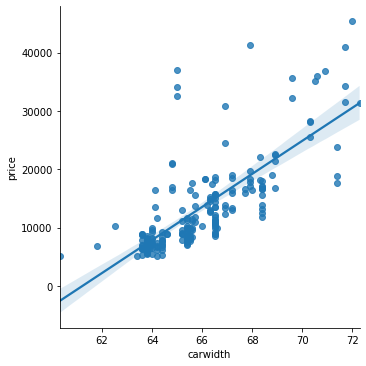

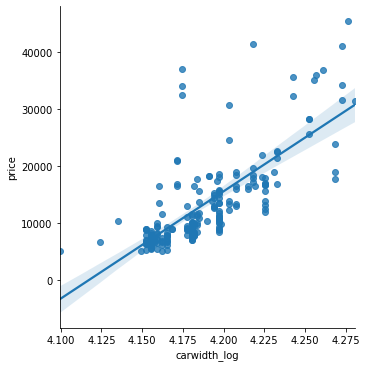

In [485]:
sns.lmplot(x='carwidth',y='price',data=data,order=1)
data['carwidth_log']=np.log(data['carwidth'])
sns.lmplot(x='carwidth_log',y='price',data=data,order=1)

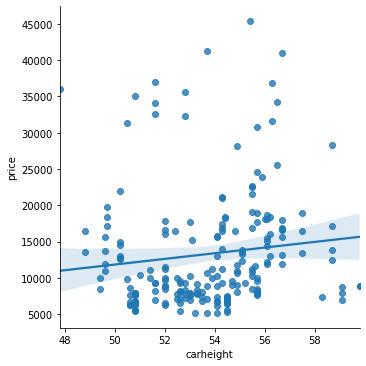

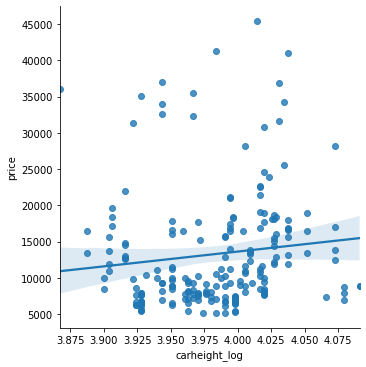

In [486]:
sns.lmplot(x='carheight',y='price',data=data,order=1)
data['carheight_log']=np.log(data['carheight'])
sns.lmplot(x='carheight_log',y='price',data=data,order=1)

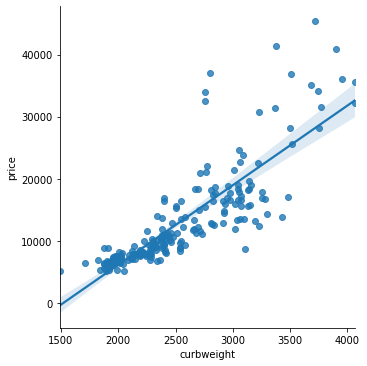

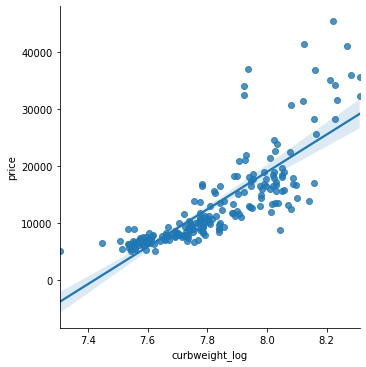

In [487]:
sns.lmplot(x='curbweight',y='price',data=data,order=1)
data['curbweight_log']=np.log(data['curbweight'])
sns.lmplot(x='curbweight_log',y='price',data=data,order=1)

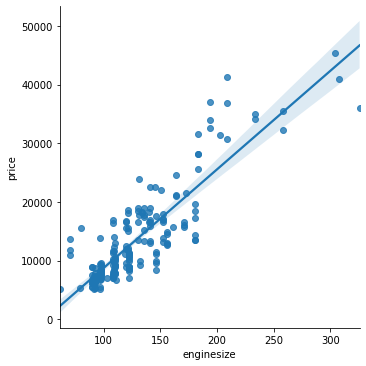

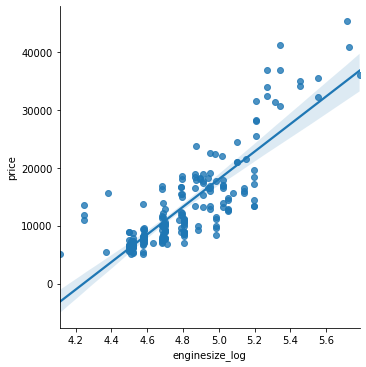

In [488]:
sns.lmplot(x='enginesize',y='price',data=data,order=1)
data['enginesize_log']=np.log(data['enginesize'])
sns.lmplot(x='enginesize_log',y='price',data=data,order=1)

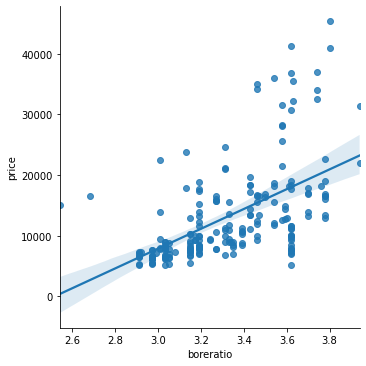

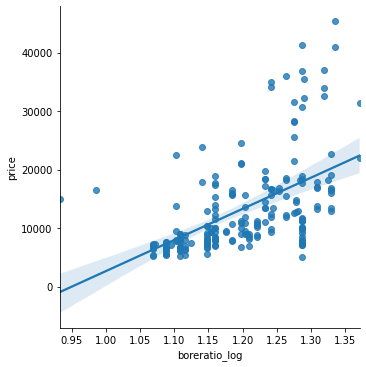

In [489]:
sns.lmplot(x='boreratio',y='price',data=data,order=1)
data['boreratio_log']=np.log(data['boreratio'])
sns.lmplot(x='boreratio_log',y='price',data=data,order=1)

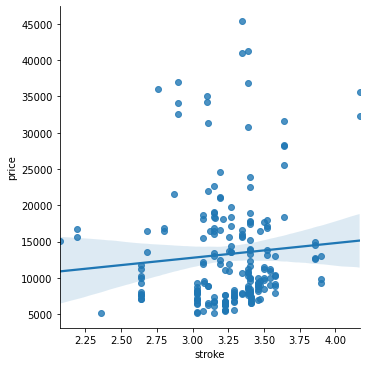

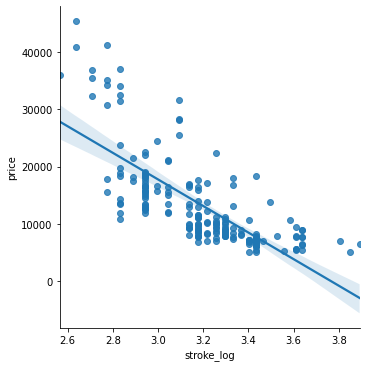

In [490]:
sns.lmplot(x='stroke',y='price',data=data,order=1)
data['stroke_log']=np.log(data['citympg'])
sns.lmplot(x='stroke_log',y='price',data=data,order=1)

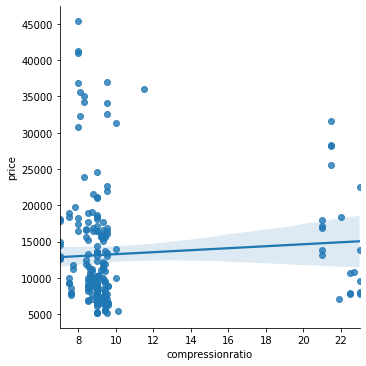

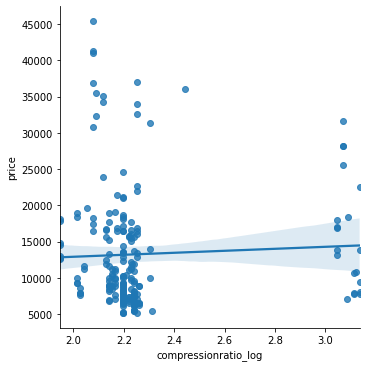

In [491]:
sns.lmplot(x='compressionratio',y='price',data=data,order=1)
data['compressionratio_log']=np.log(data['compressionratio'])
sns.lmplot(x='compressionratio_log',y='price',data=data,order=1)

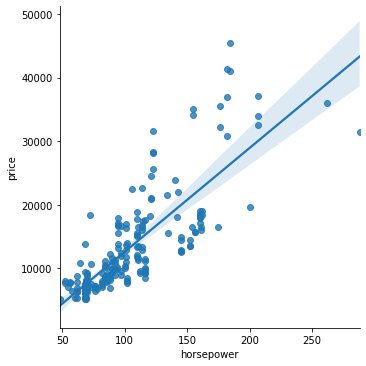

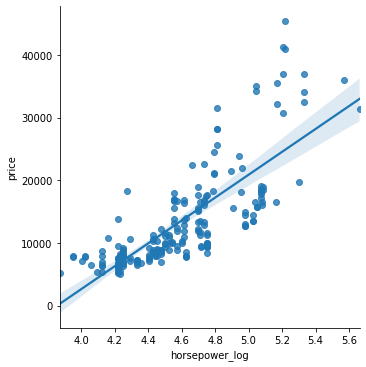

In [492]:
sns.lmplot(x='horsepower',y='price',data=data,order=1)
data['horsepower_log']=np.log(data['horsepower'])
sns.lmplot(x='horsepower_log',y='price',data=data,order=1)

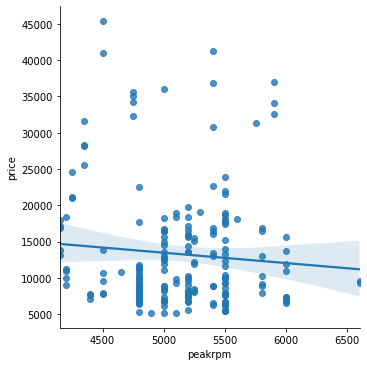

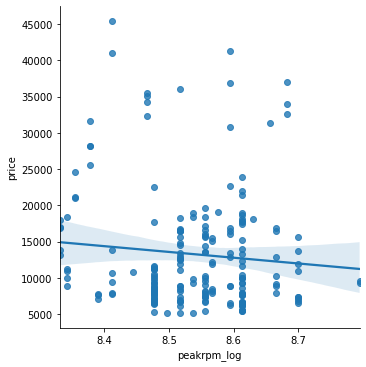

In [493]:
sns.lmplot(x='peakrpm',y='price',data=data,order=1)
data['peakrpm_log']=np.log(data['peakrpm'])
sns.lmplot(x='peakrpm_log',y='price',data=data,order=1)

In [494]:
data.head(5)

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohc,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,cylindernumber_four,cylindernumber_six,fuelsystem_2bbl,fuelsystem_idi,fuelsystem_mpfi,highwaympg_log,citympg_log,wheelbase_log,carlength_log,carwidth_log,carheight_log,curbweight_log,enginesize_log,boreratio_log,stroke_log,compressionratio_log,horsepower_log,peakrpm_log
0,88.60,168.80,64.10,48.80,2548,130,3.47,2.68,9.00,111,5000,21,27,13495.00,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,3.30,3.04,4.48,5.13,4.16,3.89,7.84,4.87,1.24,3.04,2.20,4.71,8.52
1,88.60,168.80,64.10,48.80,2548,130,3.47,2.68,9.00,111,5000,21,27,16500.00,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,3.30,3.04,4.48,5.13,4.16,3.89,7.84,4.87,1.24,3.04,2.20,4.71,8.52
2,94.50,171.20,65.50,52.40,2823,152,2.68,3.47,9.00,154,5000,19,26,16500.00,0,0,1,0,0,0,1,1,0,0,1,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1,3.26,2.94,4.55,5.14,4.18,3.96,7.95,5.02,0.99,2.94,2.20,5.04,8.52
3,99.80,176.60,66.20,54.30,2337,109,3.19,3.40,10.00,102,5500,24,30,13950.00,0,0,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,3.40,3.18,4.60,5.17,4.19,3.99,7.76,4.69,1.16,3.18,2.30,4.62,8.61
4,99.40,176.60,66.40,54.30,2824,136,3.19,3.40,8.00,115,5500,18,22,17450.00,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,3.09,2.89,4.60,5.17,4.20,3.99,7.95,4.91,1.16,2.89,2.08,4.74,8.61


In [495]:
data.filter(like='log').columns

Index(['highwaympg_log', 'citympg_log', 'wheelbase_log', 'carlength_log',
       'carwidth_log', 'carheight_log', 'curbweight_log', 'enginesize_log',
       'boreratio_log', 'stroke_log', 'compressionratio_log', 'horsepower_log',
       'peakrpm_log'],
      dtype='object')

In [496]:
X_price = data[['highwaympg_log', 'citympg_log', 'wheelbase_log', 'carlength_log',
       'carwidth_log', 'carheight_log', 'curbweight_log', 'enginesize_log',
       'boreratio_log', 'stroke_log', 'compressionratio_log', 'horsepower_log',
       'peakrpm_log','symboling_-1','symboling_0','symboling_1','symboling_2',
      'symboling_3','fueltype_diesel','fueltype_gas','aspiration_std','aspiration_turbo',
      'doornumber_four','doornumber_two','carbody_hatchback','carbody_sedan','carbody_wagon',
      'drivewheel_fwd','drivewheel_rwd','enginetype_dohc','enginetype_l','enginetype_ohc',
      'enginetype_ohcf','enginetype_ohcv','cylindernumber_four','cylindernumber_six','fuelsystem_2bbl',
      'fuelsystem_idi','fuelsystem_mpfi']].values
    									
data['price_log']=np.log(data.price)
y_price = data.price_log

In [497]:
X_price

array([[3.29583687, 3.04452244, 4.48413186, ..., 0.        , 0.        ,
        1.        ],
       [3.29583687, 3.04452244, 4.48413186, ..., 0.        , 0.        ,
        1.        ],
       [3.25809654, 2.94443898, 4.54859983, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [3.13549422, 2.89037176, 4.69226489, ..., 0.        , 0.        ,
        1.        ],
       [3.29583687, 3.25809654, 4.69226489, ..., 0.        , 1.        ,
        0.        ],
       [3.21887582, 2.94443898, 4.69226489, ..., 0.        , 0.        ,
        1.        ]])

In [498]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train_price)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [499]:
X_train_price, X_test_price, y_train_price, y_test_price = train_test_split(X_price, y_price, test_size = .2, random_state = 0)

In [500]:
#Ajustamos modelo
from sklearn.linear_model import LinearRegression
regressor_price = LinearRegression()
regressor_price.fit(scaler.transform(X_train_price), y_train_price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [501]:
#Definición de intercepto = valor promedio de la variable dependiente cuando las variables independientes valen cero
#Es importante observar el intercepto dado que este es el valor esperado de y, cuando todas las variables explicativas valen cero
#Es importante que tenga sentido
#Veamos el intercepto
regressor_price.intercept_

9.36213289062632

In [502]:
#Veamos como se ve el performance del modelo con el set de entrenamiento
y_pred_price = regressor_price.predict(scaler.transform(X_train_price))
y_pred_price

array([ 9.68985434, 10.26153114,  9.67455505,  9.38306296,  8.9392676 ,
        8.85270362,  9.5243596 ,  9.26576526,  9.24868559, 10.07271297,
        8.85615568,  9.01639833,  9.05307629,  9.80276286,  9.76305175,
        9.24194609,  9.72961472,  9.2760376 ,  8.7938099 ,  8.53936247,
        9.49010389,  9.08751963,  9.20904837,  9.43491141,  9.7298166 ,
        9.13281944,  8.66627781,  9.10555538,  8.76284943,  8.83680721,
        9.08957517,  8.74244546,  8.85576077,  9.03247717,  9.67321026,
        8.88595052,  9.58397413,  8.97093219,  9.57591554,  9.9649347 ,
        9.9591183 ,  9.11568257,  9.6613302 ,  9.22912639, 10.31389847,
        9.28658681,  9.73172246,  9.80754511,  8.92067158,  9.20904837,
        9.68624701,  9.05307629,  9.12771557,  9.69255649,  9.13347708,
        9.3795891 ,  9.52601083, 10.44960821,  9.6123781 ,  9.03374365,
        8.69071266,  8.8724095 ,  9.34202385,  8.75839031,  8.66568324,
        8.86347053,  9.78431425,  8.69365162,  9.50177287,  8.82

In [503]:
predicciones=\
pd.concat([pd.Series(y_train_price).reset_index(drop=True),pd.Series(y_pred_price)], axis=1).reset_index().drop(columns='index').rename(columns={'price':'y_train',0:'y_pred'})

predicciones

,price_log,y_pred
0,9.77,9.69
1,10.44,10.26
2,9.62,9.67
3,9.33,9.38
4,8.94,8.94
...,...,...
159,10.15,10.27
160,9.54,9.32
161,9.81,9.76
162,10.38,10.37


In [504]:
metricas(predicciones['price_log'],predicciones['y_pred'])

El r2 score es 0.9326635043370244
El error cuadrático medio es 0.016435637125616766
El error medio absoluto es 0.09723426845680475


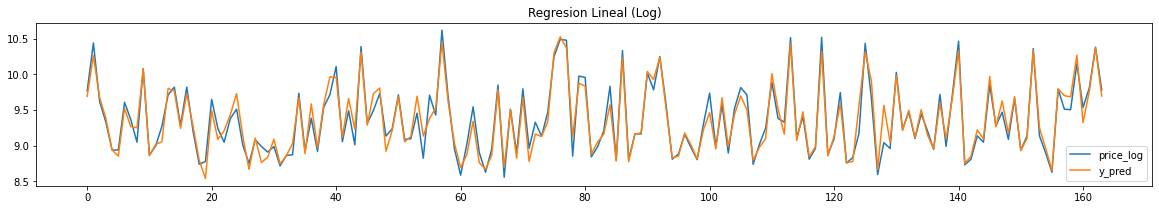

In [505]:
predicciones[['price_log', 'y_pred']].plot(figsize=(20,3),title="Regresion Lineal (Log)")

In [506]:
#Volvemos las variables a su escala original
pred = pd.DataFrame()
pred['real'] = np.exp(predicciones['price_log'])
pred['predicha'] = np.exp(predicciones['y_pred'])

metricas(pred['real'],pred['predicha'])

El r2 score es 0.9385907418210444
El error cuadrático medio es 3686398.611985855
El error medio absoluto es 1342.983286403719


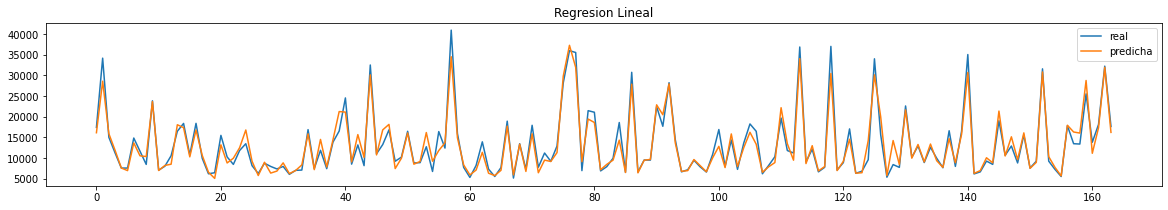

In [507]:
pred[['real','predicha']].plot(figsize=(20,3),title="Regresion Lineal")

In [508]:
#Ahora veamos el performance del test
y_pred_price = regressor_price.predict(scaler.transform(X_test_price))
y_pred_price

array([ 8.74427589,  9.78827882,  9.56665231,  8.05509591,  9.32265462,
        9.60242681,  8.68234477,  8.89238347,  9.89940881,  8.84832902,
        9.76361635, 10.5152544 ,  9.43491141,  9.5337847 ,  8.79380725,
        9.45588773,  9.34528071,  9.84178247,  9.05403839,  8.80478616,
        9.21814392,  9.59472271,  9.21658555,  9.49902632,  9.99807926,
        8.77847935,  8.89810177,  9.50012913,  8.8636414 ,  8.80144672,
        9.17327315,  9.28679137,  9.88152456,  9.17684868,  8.87419081,
       10.20105512,  9.39174637,  9.60880481,  8.70998743, 10.41080212,
        8.71742497])

In [509]:
predicciones=\
pd.concat([pd.Series(y_test_price).reset_index(drop=True),pd.Series(y_pred_price)], axis=1).reset_index().drop(columns='index').rename(columns={'price':'y_test',0:'y_pred'})

predicciones

,price_log,y_pred
0,8.82,8.74
1,9.66,9.79
2,9.63,9.57
3,8.55,8.06
4,9.21,9.32
5,9.32,9.60
6,8.59,8.68
7,8.97,8.89
8,9.75,9.90
9,8.78,8.85


In [510]:
metricas(predicciones['price_log'],predicciones['y_pred'])

El r2 score es 0.8632859915156442
El error cuadrático medio es 0.03902746324225866
El error medio absoluto es 0.15973477727720958


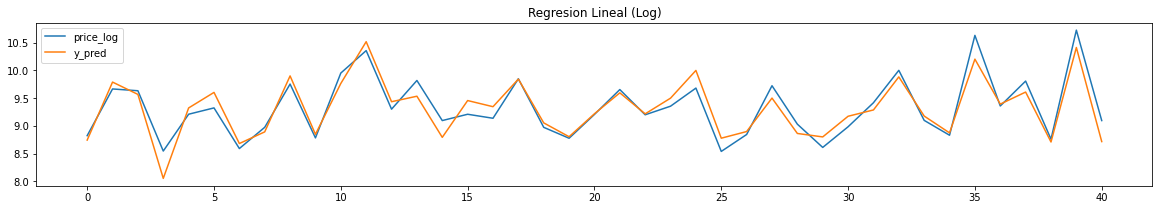

In [511]:
predicciones[['price_log', 'y_pred']].plot(figsize=(20,3),title="Regresion Lineal (Log)")

In [512]:
#Volvemos las variables a su escala original
pred = pd.DataFrame()

pred['real'] = np.exp(predicciones['price_log'])
pred['predicha'] = np.exp(predicciones['y_pred'])

In [513]:
metricas(pred['real'],pred['predicha'])

El r2 score es 0.8242416946598365
El error cuadrático medio es 13606567.926738998
El error medio absoluto es 2304.0512786705904


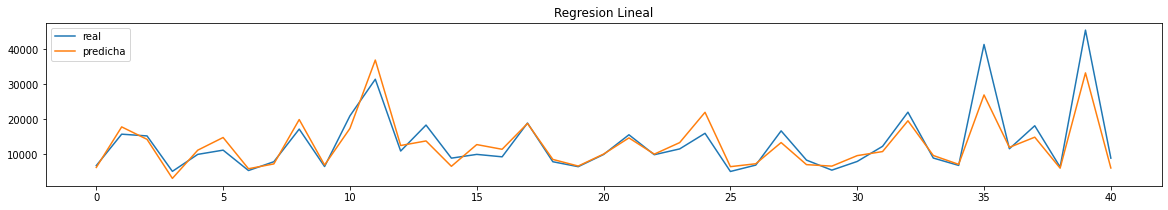

In [514]:
pred[['real','predicha']].plot(figsize=(20,3),title="Regresion Lineal")

### lasso

# La regularización Lasso penaliza la suma del valor absolutos de los coeficientes de regresión $(||\beta||_{1} = \sum_{j=1}^{p} |\beta_{j}| )$   . A esta penalización se le conoce como $L_{1}$ y **tiene el efecto de forzar a que los coeficientes de los predictores tiendan a cero**. Dado que un predictor con coeficiente de regresión cero no influye en el modelo, *lasso consigue excluir los predictores menos relevantes*. Al igual que en ridge, el grado de penalización está controlado por el hiperparámetro λ. Cuando λ=0, el resultado es equivalente al de un modelo lineal por mínimos cuadrados ordinarios. A medida que λ aumenta, mayor es la penalización y más predictores quedan excluidos.

# $\sum_{i=1}^{n}(y_{i}-\beta_{0}-\sum_{j=1}^{p}\beta_{j}x_{ij})^2$ + $\lambda \sum_{j=1}^{p}|\beta_{j}|$ = suma residuos cuadrados + $\lambda \sum_{j=1}^{p}|\beta_{j}|$


### Nota: Encontrar el valor óptimo para $\lambda$ se hace por válidación cruzada probando con diferentes valores de $\lambda$. 

In [515]:
from sklearn.linear_model import Lasso

In [516]:
X_train_price, X_test_price, y_train_price, y_test_price = train_test_split(X_price, y_price, test_size = .2, random_state = 0)

In [520]:
#alpha es lamda
lasso=Lasso(alpha=.01)

In [521]:
lasso.fit(scaler.transform(X_train_price),y_train_price)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [522]:
#Definición de intercepto = valor promedio de la variable dependiente cuando las variables independientes valen cero
#Es importante observar el intercepto dado que este es el valor esperado de y, cuando todas las variables explicativas valen cero
#Es importante que tenga sentido
print(lasso.intercept_)

9.362132890626318


In [523]:
#Veamos con cuantas variables se quedo
print(lasso.coef_)

[-0.         -0.01473917  0.          0.          0.07270236  0.00481676
  0.10282713  0.06264092  0.         -0.01343203  0.02394311  0.09790767
  0.          0.          0.         -0.00379754  0.          0.02754962
  0.         -0.         -0.          0.          0.         -0.
 -0.03782903  0.         -0.01363521 -0.00121649  0.05727554 -0.
 -0.00677782  0.01123335  0.0074862  -0.02500716 -0.07942737  0.
 -0.02022288  0.          0.02368468]


In [524]:
#Variables diferentes de cero
x=[]
for i in range(0,len(lasso.coef_)):
  if lasso.coef_[i]!=0:
    x.append(i)


names=['highwaympg_log', 'citympg_log', 'wheelbase_log', 'carlength_log',
       'carwidth_log', 'carheight_log', 'curbweight_log', 'enginesize_log',
       'boreratio_log', 'stroke_log', 'compressionratio_log', 'horsepower_log',
       'peakrpm_log','symboling_-1','symboling_0','symboling_1','symboling_2',
      'symboling_3','fueltype_diesel','fueltype_gas','aspiration_std','aspiration_turbo',
      'doornumber_four','doornumber_two','carbody_hatchback','carbody_sedan','carbody_wagon',
      'drivewheel_fwd','drivewheel_rwd','enginetype_dohc','enginetype_l','enginetype_ohc',
      'enginetype_ohcf','enginetype_ohcv','cylindernumber_four','cylindernumber_six','fuelsystem_2bbl',
      'fuelsystem_idi','fuelsystem_mpfi']

for i in x:
    print(names[i])


citympg_log
carwidth_log
carheight_log
curbweight_log
enginesize_log
stroke_log
compressionratio_log
horsepower_log
symboling_1
symboling_3
carbody_hatchback
carbody_wagon
drivewheel_fwd
drivewheel_rwd
enginetype_l
enginetype_ohc
enginetype_ohcf
enginetype_ohcv
cylindernumber_four
fuelsystem_2bbl
fuelsystem_mpfi


In [526]:
y_pred_price=lasso.predict(scaler.transform(X_train_price))
y_pred_price

array([ 9.7145248 , 10.26542965,  9.46062705,  9.32739034,  8.91005863,
        8.83938152,  9.56083337,  9.31925769,  9.20137917,  9.98094612,
        8.89180934,  9.04905116,  9.09927822,  9.74375601,  9.8803997 ,
        9.21014543,  9.80096905,  9.23959143,  8.75179717,  8.6444632 ,
        9.4679955 ,  9.0683351 ,  9.19849758,  9.46920186,  9.80174225,
        9.15916825,  8.70923244,  9.04226673,  8.83635013,  8.8496111 ,
        9.02074752,  8.75419957,  8.87581516,  9.04425728,  9.68144436,
        8.86352327,  9.61375742,  9.0476854 ,  9.6831117 , 10.0286499 ,
        9.94082682,  9.13007161,  9.67245558,  9.18658015, 10.12192563,
        9.32185443,  9.68566367,  9.7432038 ,  8.9484277 ,  9.19849758,
        9.69514976,  9.09927822,  9.14396169,  9.66288288,  9.09301636,
        9.38565217,  9.61018665, 10.41183772,  9.67829563,  9.02004877,
        8.71825706,  8.87957861,  9.31203989,  8.83297623,  8.71927115,
        8.90346687,  9.77977985,  8.75505898,  9.5222248 ,  8.85

In [527]:
predicciones=\
pd.concat([pd.Series(y_train_price).reset_index(drop=True),pd.Series(y_pred_price)], axis=1).reset_index().drop(columns='index').rename(columns={'price':'y_train',0:'y_pred'})

predicciones

,price_log,y_pred
0,9.77,9.71
1,10.44,10.27
2,9.62,9.46
3,9.33,9.33
4,8.94,8.91
...,...,...
159,10.15,10.18
160,9.54,9.23
161,9.81,9.76
162,10.38,10.40


In [528]:
metricas(predicciones['price_log'],predicciones['y_pred'])

El r2 score es 0.9176165665875861
El error cuadrático medio es 0.02010832615207428
El error medio absoluto es 0.1052567178731199


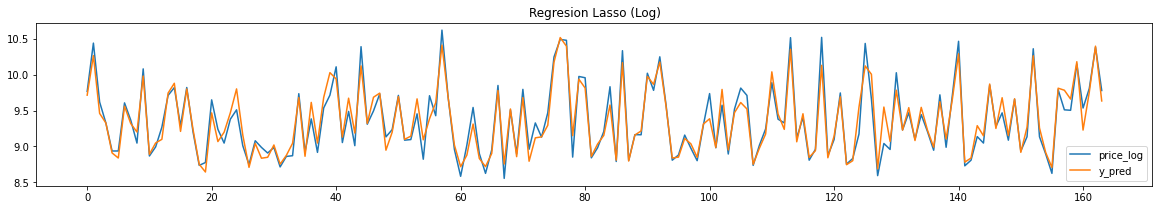

In [529]:
predicciones[['price_log', 'y_pred']].plot(figsize=(20,3),title="Regresion Lasso (Log)")

In [530]:
#Volvemos las variables a su escala original
pred = pd.DataFrame()
pred['real'] = np.exp(predicciones['price_log'])
pred['predicha'] = np.exp(predicciones['y_pred'])

metricas(pred['real'],pred['predicha'])

El r2 score es 0.8994243874614917
El error cuadrático medio es 6037555.402169653
El error medio absoluto es 1549.761877409757


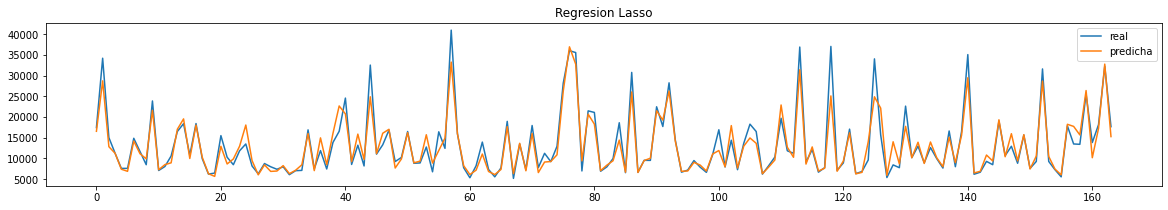

In [531]:
pred[['real','predicha']].plot(figsize=(20,3),title="Regresion Lasso")

In [536]:
y_pred_price=lasso.predict(scaler.transform(X_test_price))
y_pred_price

array([ 8.75558452,  9.95800739,  9.62932595,  8.39103914,  9.2667769 ,
        9.57701859,  8.75471926,  8.88097498,  9.96161987,  8.83831882,
        9.80357513, 10.38291698,  9.46920186,  9.43720598,  8.80927783,
        9.46949577,  9.33448048,  9.84295184,  9.05288461,  8.7396352 ,
        9.25732315,  9.61722173,  9.26472299,  9.50213562, 10.04138024,
        8.79319722,  8.92642873,  9.60943118,  8.86225335,  8.84113028,
        9.18586496,  9.28854869,  9.78526723,  9.28490071,  8.85462555,
       10.22250383,  9.25877123,  9.57220467,  8.72724599, 10.38204957,
        8.79095553])

In [537]:
predicciones=\
pd.concat([pd.Series(y_test_price).reset_index(drop=True),pd.Series(y_pred_price)], axis=1).reset_index().drop(columns='index').rename(columns={'price':'y_test',0:'y_pred'})

predicciones

,price_log,y_pred
0,8.82,8.76
1,9.66,9.96
2,9.63,9.63
3,8.55,8.39
4,9.21,9.27
5,9.32,9.58
6,8.59,8.75
7,8.97,8.88
8,9.75,9.96
9,8.78,8.84


In [538]:
metricas(predicciones['price_log'],predicciones['y_pred'])

El r2 score es 0.8668025428546735
El error cuadrático medio es 0.03802360065608348
El error medio absoluto es 0.16144118067678417


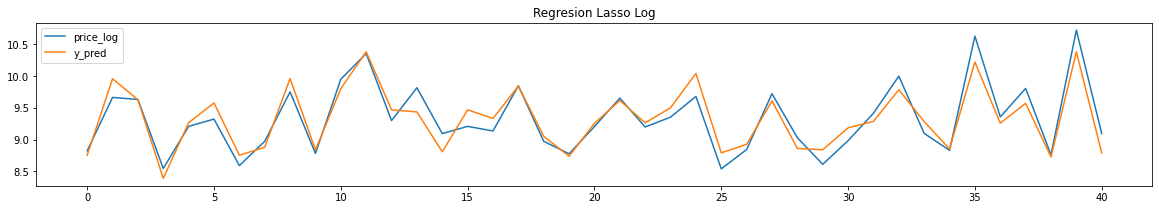

In [539]:
predicciones[['price_log','y_pred']].plot(figsize=(20,3),title="Regresion Lasso Log")

In [540]:
#Volvemos las variables a su escala original
pred = pd.DataFrame()
pred['real'] = np.exp(predicciones['price_log'])
pred['predicha'] = np.exp(predicciones['y_pred'])

metricas(pred['real'],pred['predicha'])

El r2 score es 0.8123094671744
El error cuadrático medio es 14530317.524140209
El error medio absoluto es 2370.429292538386


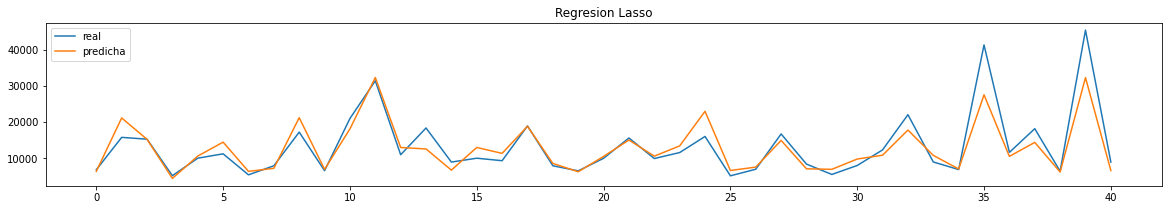

In [541]:
pred[['real','predicha']].plot(figsize=(20,3),title="Regresion Lasso")

### Ridge

# La regularización Ridge penaliza la suma de los coeficientes elevados al cuadrado $(||\beta||_{2}^{2}=\sum_{j=1}^{p} \beta_{j}^{2})$ . A esta penalización se le conoce como $L_{2}$ y **tiene el efecto de reducir de forma proporcional el valor de todos los coeficientes del modelo pero sin que estos lleguen a cero**. El grado de penalización está controlado por el hiperparámetro $\lambda$. *Cuando $\lambda=0$, la penalización es nula y el resultado es equivalente al de un modelo lineal por mínimos cuadrados ordinarios (OLS)*. A medida que $\lambda$ aumenta, mayor es la penalización y menor el valor de los predictores.

# # $\sum_{i=1}^{n}(y_{i}-\beta_{0}-\sum_{j=1}^{p}\beta_{j}x_{ij})^2$ + $\lambda \sum_{j=1}^{p}\beta_{j}^2$ = suma residuos cuadrados + $\lambda \sum_{j=1}^{p}\beta_{j}^2$


# La principal ventaja de aplicar ridge frente al ajuste por mínimos cuadrados ordinarios (OLS) es la reducción de varianza. Por lo general, en situaciones en las que la relación entre la variable respuesta y los predictores es aproximadamente lineal, las estimaciones por mínimos cuadrados tienen poco bias pero aún pueden sufrir alta varianza (pequeños cambios en los datos de entrenamiento tienen mucho impacto en el modelo resultante). Este problema se acentúa conforme el número de predictores introducido en el modelo se aproxima al número de observaciones de entrenamiento, llegando al punto en que, si $p>n$, no es posible ajustar el modelo por mínimos cuadrados ordinarios. Empleando un valor adecuado de $\lambda$, el método de ridge es capaz de reducir varianza sin apenas aumentar el bias, consiguiendo así un menor error total.

# La desventaja del método ridge es que, el modelo final, incluye todos los predictores. Esto es así porque, si bien la penalización fuerza a que los coeficientes tiendan a cero, nunca llegan a ser exactamente cero (solo si $\lambda$ = $\infty$). Este método consigue minimizar la influencia sobre el modelo de los predictores menos relacionados con la variable respuesta pero, en el modelo final, van a seguir apareciendo. Aunque esto no supone un problema para la precisión del modelo, sí lo es para su interpretación.

### Nota: Funciona bien con queremos eliminar multicolinealidad en las variables independientes

In [542]:
from sklearn.linear_model import Ridge

In [543]:
ridge=Ridge(alpha=.01)

In [544]:
ridge.fit(scaler.transform(X_train_price),y_train_price)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [545]:
ridge.intercept_

9.36213289062632

In [547]:
print(ridge.coef_)

[ 0.06608035 -0.05892325  0.00262978 -0.03260696  0.07884376  0.04775219
  0.13571714  0.14325711 -0.03738404 -0.05892325  0.10480993  0.0297934
  0.03317238  0.03876224  0.08198651  0.07310873  0.04996418  0.097892
 -0.02322104  0.02322104 -0.01960917  0.01960917  0.01337377 -0.01337377
 -0.05205458 -0.03063314 -0.05577334  0.00660107  0.09981489 -0.03537665
 -0.06280116 -0.02546935  0.01309574 -0.06612393 -0.054073   -0.01601566
 -0.00606433 -0.02322104  0.04714288]


In [552]:
#Dado que Ridge hace el coeficiente más pequeño de acuerdo a su importancia veamos que coeficiente asocia a cada variable
coefs=pd.DataFrame()
coeficiente=[x for x in ridge.coef_]
names=['highwaympg_log', 'citympg_log', 'wheelbase_log', 'carlength_log',
       'carwidth_log', 'carheight_log', 'curbweight_log', 'enginesize_log',
       'boreratio_log', 'stroke_log', 'compressionratio_log', 'horsepower_log',
       'peakrpm_log','symboling_-1','symboling_0','symboling_1','symboling_2',
      'symboling_3','fueltype_diesel','fueltype_gas','aspiration_std','aspiration_turbo',
      'doornumber_four','doornumber_two','carbody_hatchback','carbody_sedan','carbody_wagon',
      'drivewheel_fwd','drivewheel_rwd','enginetype_dohc','enginetype_l','enginetype_ohc',
      'enginetype_ohcf','enginetype_ohcv','cylindernumber_four','cylindernumber_six','fuelsystem_2bbl',
      'fuelsystem_idi','fuelsystem_mpfi']
coefs['names']=names
coefs['coeficiente']=coeficiente

In [558]:
coefs.sort_values(by=['coeficiente'], inplace=True, ascending=False)
coefs

,names,coeficiente
7,enginesize_log,0.14
6,curbweight_log,0.14
10,compressionratio_log,0.10
28,drivewheel_rwd,0.10
17,symboling_3,0.10
14,symboling_0,0.08
4,carwidth_log,0.08
15,symboling_1,0.07
0,highwaympg_log,0.07
16,symboling_2,0.05


In [559]:
y_pred_price=ridge.predict(scaler.transform(X_train_price))
y_pred_price

array([ 9.69014105, 10.26149066,  9.67422157,  9.38296249,  8.93905707,
        8.85263416,  9.52438103,  9.26585856,  9.2485326 , 10.07266733,
        8.85618539,  9.01646962,  9.05306051,  9.80267148,  9.76319687,
        9.24192019,  9.73020718,  9.27597942,  8.79371405,  8.53928778,
        9.490072  ,  9.08744768,  9.20898821,  9.43481309,  9.72989977,
        9.13275771,  8.66629946,  9.10527809,  8.76290441,  8.83684009,
        9.08954072,  8.7424563 ,  8.85575947,  9.03250263,  9.67308885,
        8.88585818,  9.5840371 ,  8.97107537,  9.57606695,  9.9651643 ,
        9.95906498,  9.11558522,  9.66122493,  9.229     , 10.31375491,
        9.28662649,  9.73181034,  9.80739337,  8.92076417,  9.20898821,
        9.68625877,  9.05306051,  9.12766183,  9.69255809,  9.13347981,
        9.37978297,  9.52618218, 10.44947071,  9.61275238,  9.033786  ,
        8.6906686 ,  8.87248374,  9.34203329,  8.75845135,  8.66570671,
        8.86348174,  9.78437953,  8.69380205,  9.50183148,  8.82

In [560]:
predicciones=\
pd.concat([pd.Series(y_train_price).reset_index(drop=True),pd.Series(y_pred_price)], axis=1).reset_index().drop(columns='index').rename(columns={'price':'y_train',0:'y_pred'})

predicciones

,price_log,y_pred
0,9.77,9.69
1,10.44,10.26
2,9.62,9.67
3,9.33,9.38
4,8.94,8.94
...,...,...
159,10.15,10.27
160,9.54,9.32
161,9.81,9.76
162,10.38,10.37


In [561]:
metricas(predicciones['price_log'],predicciones['y_pred'])

El r2 score es 0.932663429895788
El error cuadrático medio es 0.016435655295394352
El error medio absoluto es 0.09722812897193475


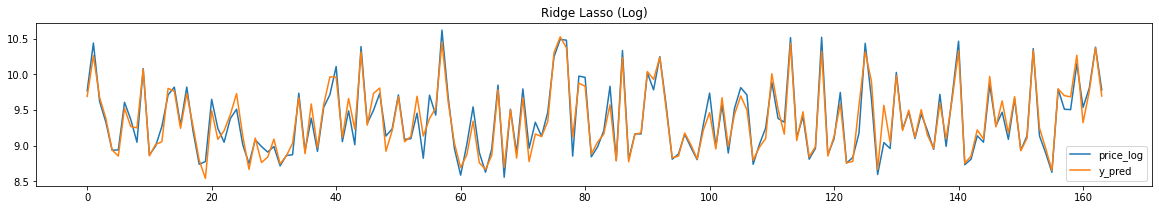

In [562]:
predicciones[['price_log', 'y_pred']].plot(figsize=(20,3),title="Ridge Lasso (Log)")

In [563]:
#Volvemos las variables a su escala original
pred = pd.DataFrame()
pred['real'] = np.exp(predicciones['price_log'])
pred['predicha'] = np.exp(predicciones['y_pred'])

metricas(pred['real'],pred['predicha'])

El r2 score es 0.9385638228936536
El error cuadrático medio es 3688014.555566878
El error medio absoluto es 1343.0706831237785


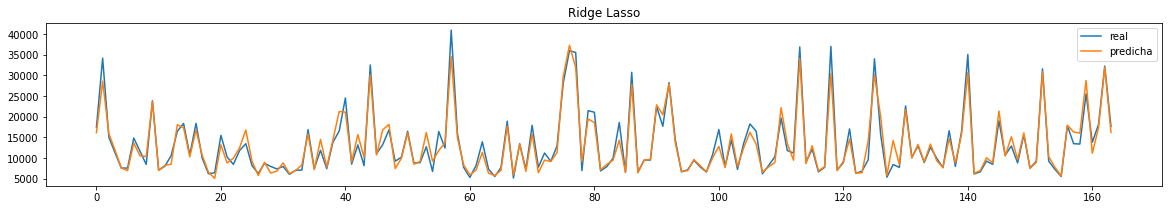

In [565]:
pred[['real','predicha']].plot(figsize=(20,3),title="Ridge Lasso")

In [566]:
y_pred_price=ridge.predict(scaler.transform(X_test_price))
y_pred_price

array([ 8.74428424,  9.78853808,  9.56692997,  8.05595075,  9.32254722,
        9.60235151,  8.68244221,  8.89239598,  9.89957502,  8.8482783 ,
        9.76370135, 10.51391945,  9.43481309,  9.53373816,  8.7938385 ,
        9.45584463,  9.34504251,  9.84187688,  9.05401262,  8.8046144 ,
        9.21838769,  9.59475013,  9.21650095,  9.49892457,  9.99827208,
        8.77847639,  8.89818392,  9.50033084,  8.86370507,  8.80147016,
        9.17322358,  9.28673983,  9.88145754,  9.17696363,  8.87411446,
       10.20112831,  9.39167158,  9.60876306,  8.7100046 , 10.41063763,
        8.71748354])

In [567]:
predicciones=\
pd.concat([pd.Series(y_test_price).reset_index(drop=True),pd.Series(y_pred_price)], axis=1).reset_index().drop(columns='index').rename(columns={'price':'y_test',0:'y_pred'})

predicciones

,price_log,y_pred
0,8.82,8.74
1,9.66,9.79
2,9.63,9.57
3,8.55,8.06
4,9.21,9.32
5,9.32,9.60
6,8.59,8.68
7,8.97,8.89
8,9.75,9.90
9,8.78,8.85


In [568]:
metricas(predicciones['price_log'],predicciones['y_pred'])

El r2 score es 0.863406397032884
El error cuadrático medio es 0.03899309133004324
El error medio absoluto es 0.15966673015471947


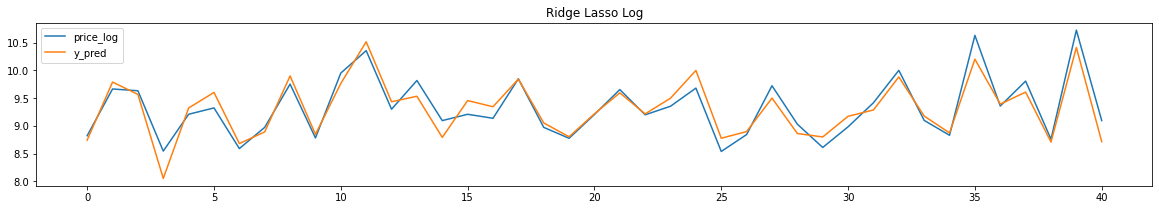

In [569]:
predicciones[['price_log','y_pred']].plot(figsize=(20,3),title="Ridge Lasso Log")

In [570]:
#Volvemos las variables a su escala original
pred = pd.DataFrame()
pred['real'] = np.exp(predicciones['price_log'])
pred['predicha'] = np.exp(predicciones['y_pred'])

metricas(pred['real'],pred['predicha'])

El r2 score es 0.8243806088163463
El error cuadrático medio es 13595813.698636506
El error medio absoluto es 2302.7718308592252


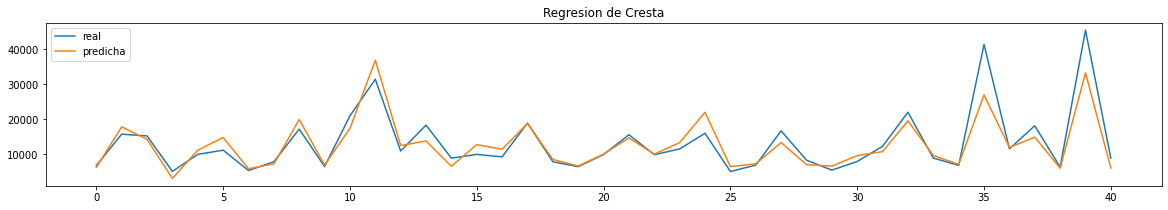

In [571]:
pred[['real','predicha']].plot(figsize=(20,3),title="Regresion de Cresta")

### ELASTIC NET

# Elastic net incluye una regularización que combina la penalización $L_{1}$ y $L_2$ : ($\alpha \lambda ||\beta||_{1}+\frac{1}{2}(1-\alpha)||\beta||_{2}^{2}$). El grado en que influye cada una de las penalizaciones está controlado por el hiperparámetro α. Su valor está comprendido en el intervalo $[0,1]$. Cuando $\alpha=0$, se aplica ridge y cuando $\alpha=1$ se aplica lasso. La combinación de ambas penalizaciones suele dar lugar a buenos resultados. Una estrategia frecuentemente utilizada es asignarle casi todo el peso a la penalización $L_{1}$ ($\alpha$ muy próximo a 1) para conseguir seleccionar predictores y un poco a la $L_{2}$ para dar cierta estabilidad en el caso de que algunos predictores estén correlacionados.

# $\frac{\sum_{i=1}^{n}(y_{i}-\beta_{0}-\sum_{j=1}^{p}\beta_{j}x_{ij})^{2}}{2n}$ + $\lambda(\alpha \sum_{j=1}^{p}|\beta_{j}|+\frac{1-\alpha}{2}+\sum_{j=1}^{p}\beta_{j}^{2})$

In [573]:
from sklearn.linear_model import ElasticNet

In [599]:
elastic=ElasticNet(alpha=.2,l1_ratio=.5)

In [600]:
elastic.fit(scaler.transform(X_train_price),y_train_price)

ElasticNet(alpha=0.2, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [601]:
elastic.intercept_

9.362132890626315

In [602]:
y_pred_price=elastic.predict(scaler.transform(X_train_price))
y_pred_price

array([ 9.57842264, 10.10625241,  9.42230478,  9.31826454,  9.03130461,
        8.95400579,  9.59164068,  9.35637793,  9.18527062,  9.78180557,
        8.90758316,  9.09659697,  9.2538175 ,  9.70255558,  9.86005802,
        9.17740401,  9.69196593,  9.22673021,  8.94704455,  8.78976152,
        9.43398655,  9.14980687,  9.26034386,  9.3538768 ,  9.76658937,
        9.25046261,  8.899427  ,  9.22496287,  8.98717193,  8.95261139,
        9.01081184,  8.93635404,  9.05950788,  9.11390744,  9.61237732,
        8.96655749,  9.5622701 ,  9.16784584,  9.65676213,  9.80783336,
        9.73075467,  9.15882713,  9.60170161,  9.16769426,  9.80320319,
        9.39000691,  9.53588647,  9.61015327,  9.04663716,  9.26034386,
        9.69931021,  9.2538175 ,  9.27000666,  9.62292123,  9.16277702,
        9.31115813,  9.60434458, 10.24066447,  9.56712097,  9.00998196,
        8.91868149,  8.97819758,  9.27227921,  8.98316485,  8.91403255,
        9.00330966,  9.71457327,  8.93624321,  9.40255787,  8.96

In [603]:
predicciones=\
pd.concat([pd.Series(y_train_price).reset_index(drop=True),pd.Series(y_pred_price)], axis=1).reset_index().drop(columns='index').rename(columns={'price':'y_train',0:'y_pred'})

predicciones

,price_log,y_pred
0,9.77,9.58
1,10.44,10.11
2,9.62,9.42
3,9.33,9.32
4,8.94,9.03
...,...,...
159,10.15,9.90
160,9.54,9.20
161,9.81,9.70
162,10.38,10.17


In [604]:
metricas(predicciones['price_log'],predicciones['y_pred'])

El r2 score es 0.8200991578636558
El error cuadrático medio es 0.04391058564652309
El error medio absoluto es 0.16705398397628798


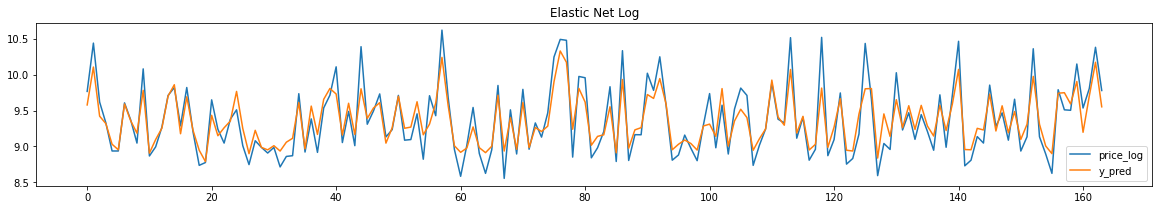

In [605]:
predicciones[['price_log','y_pred']].plot(figsize=(20,3),title="Elastic Net Log")

In [606]:
#Volvemos las variables a su escala original
pred = pd.DataFrame()
pred['real'] = np.exp(predicciones['price_log'])
pred['predicha'] = np.exp(predicciones['y_pred'])

metricas(pred['real'],pred['predicha'])

El r2 score es 0.7331089368159696
El error cuadrático medio es 16021474.188890329
El error medio absoluto es 2487.3507847891124


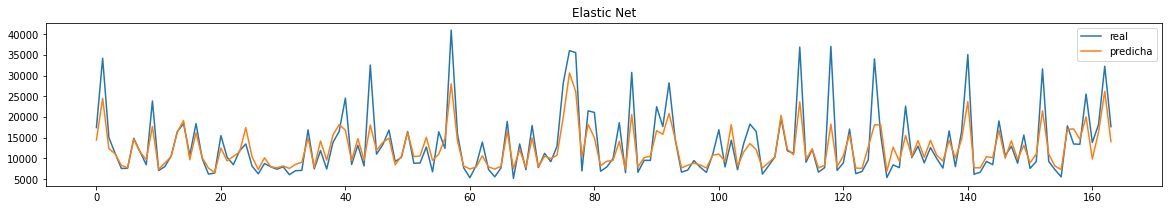

In [607]:
pred[['real','predicha']].plot(figsize=(20,3),title="Elastic Net")

In [608]:
y_pred_price=elastic.predict(scaler.transform(X_test_price))
y_pred_price

array([ 8.93799891,  9.8039144 ,  9.48585462,  8.57525678,  9.23474274,
        9.48700444,  8.93157487,  9.03340148,  9.84635076,  8.98240633,
        9.60597447, 10.16671537,  9.3538768 ,  9.34649256,  8.91100837,
        9.45636287,  9.35215415,  9.69318031,  9.1725677 ,  8.93988367,
        9.30066019,  9.56857167,  9.32470933,  9.49512825,  9.82118275,
        8.9822733 ,  9.02242333,  9.60991791,  9.04135055,  8.93996202,
        9.16684485,  9.3055411 ,  9.64619558,  9.25473008,  8.95598994,
        9.98227639,  9.17632856,  9.54479335,  8.91739841, 10.21357098,
        8.899427  ])

In [609]:
predicciones=\
pd.concat([pd.Series(y_test_price).reset_index(drop=True),pd.Series(y_pred_price)], axis=1).reset_index().drop(columns='index').rename(columns={'price':'y_test',0:'y_pred'})

predicciones

,price_log,y_pred
0,8.82,8.94
1,9.66,9.80
2,9.63,9.49
3,8.55,8.58
4,9.21,9.23
5,9.32,9.49
6,8.59,8.93
7,8.97,9.03
8,9.75,9.85
9,8.78,8.98


In [610]:
metricas(predicciones['price_log'],predicciones['y_pred'])

El r2 score es 0.8009448785509168
El error cuadrático medio es 0.05682385091083326
El error medio absoluto es 0.19664975651117422


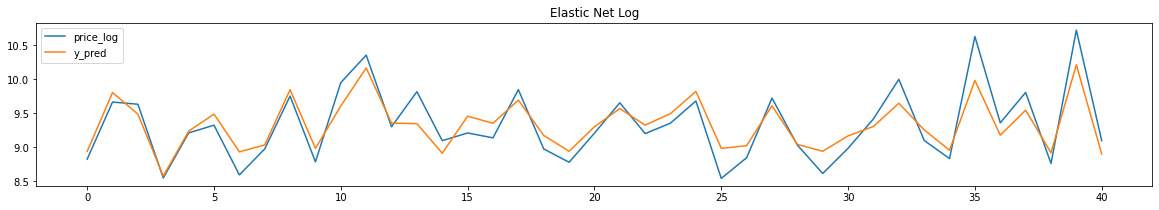

In [612]:
predicciones[['price_log','y_pred']].plot(figsize=(20,3),title="Elastic Net Log")

In [613]:
#Volvemos las variables a su escala original
pred = pd.DataFrame()
pred['real'] = np.exp(predicciones['price_log'])
pred['predicha'] = np.exp(predicciones['y_pred'])

metricas(pred['real'],pred['predicha'])

El r2 score es 0.68900152311915
El error cuadrático medio es 24076369.4927631
El error medio absoluto es 2900.042482357027


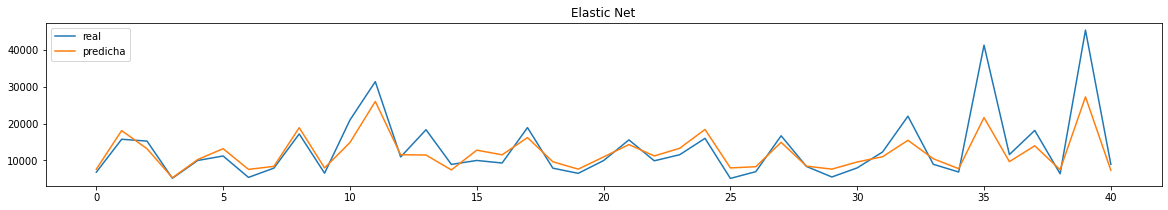

In [614]:
pred[['real','predicha']].plot(figsize=(20,3),title="Elastic Net")

# PREDICCION DE SEXO - EJERCICIO 2 - REGRESION LOGISTICA

In [615]:
data=pd.read_csv('/content/drive/MyDrive/datasets/data_voice_completa.csv')

In [616]:
gender = {'male': 0,'female': 1} 
  
# traversing through dataframe 
# Gender column and writing 
# values where key matches 
data.label = [gender[item] for item in data.label] 

In [617]:
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.23,0.03,0.24,0.22,0.26,0.04,1.80,5.35,0.84,0.17,0.23,0.23,0.18,0.05,0.28,1.08,0.02,10.22,10.20,0.04,1
1,0.24,0.04,0.24,0.23,0.26,0.04,1.95,5.96,0.83,0.18,0.23,0.24,0.18,0.05,0.28,2.50,0.02,15.63,15.61,0.10,1
2,0.24,0.04,0.24,0.23,0.26,0.03,2.18,7.32,0.83,0.24,0.24,0.24,0.18,0.05,0.27,1.38,0.02,10.62,10.59,0.10,1
3,0.22,0.03,0.23,0.21,0.24,0.03,2.20,7.36,0.83,0.20,0.23,0.22,0.19,0.05,0.27,0.85,0.02,5.16,5.13,0.13,1
4,0.23,0.03,0.24,0.22,0.26,0.04,2.35,8.75,0.83,0.18,0.24,0.23,0.19,0.05,0.28,1.13,0.02,9.61,9.59,0.06,1


In [618]:
data['label'].unique()

array([1, 0])

In [620]:
data.shape

(3168, 21)

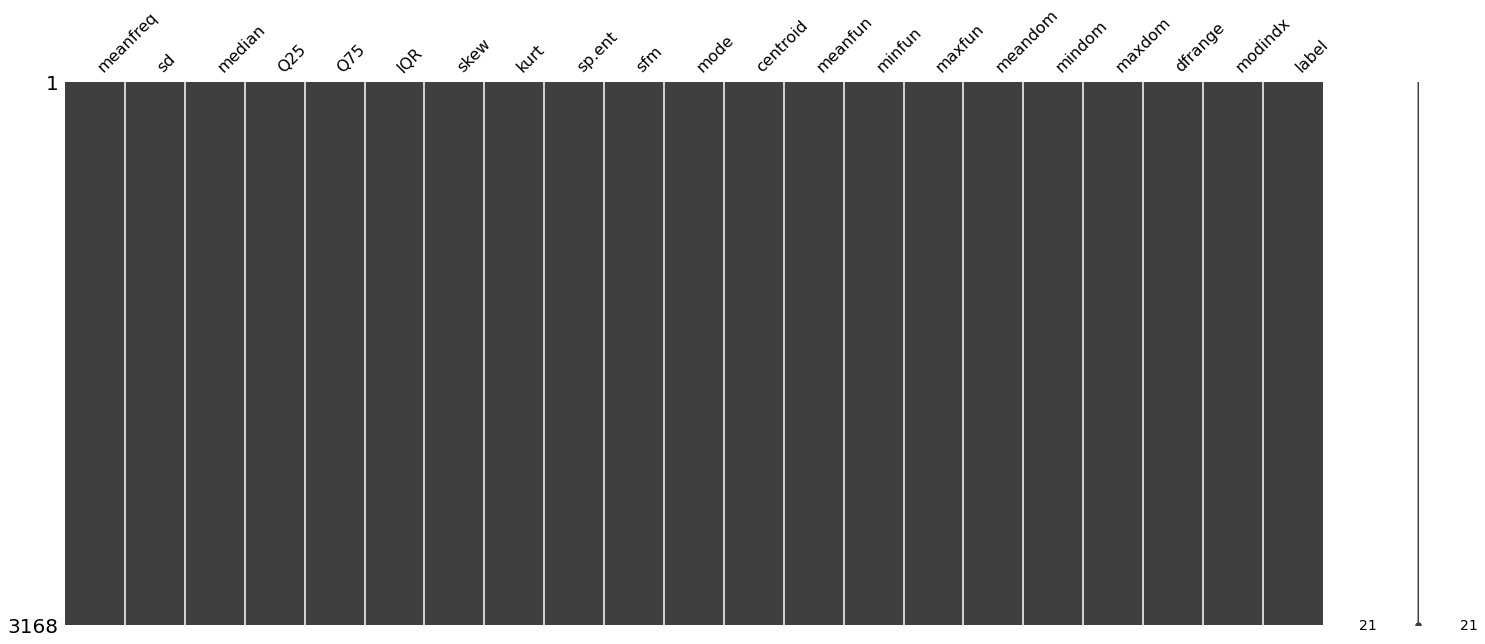

In [621]:
msno.matrix(data)

In [622]:
data.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
count,3168.00,3168.00,3168.00,3168.00,3168.00,3168.00,3168.00,3168.00,3168.00,3168.00,3168.00,3168.00,3168.00,3168.00,3168.00,3168.00,3168.00,3168.00,3168.00,3168.00,3168.00
mean,0.18,0.06,0.19,0.14,0.22,0.08,3.14,36.57,0.90,0.41,0.17,0.18,0.14,0.04,0.26,0.83,0.05,5.05,4.99,0.17,0.50
std,0.03,0.02,0.04,0.05,0.02,0.04,4.24,134.93,0.04,0.18,0.08,0.03,0.03,0.02,0.03,0.53,0.06,3.52,3.52,0.12,0.50
min,0.04,0.02,0.01,0.00,0.04,0.01,0.14,2.07,0.74,0.04,0.00,0.04,0.06,0.01,0.10,0.01,0.00,0.01,0.00,0.00,0.00
25%,0.16,0.04,0.17,0.11,0.21,0.04,1.65,5.67,0.86,0.26,0.12,0.16,0.12,0.02,0.25,0.42,0.01,2.07,2.04,0.10,0.00
50%,0.18,0.06,0.19,0.14,0.23,0.09,2.20,8.32,0.90,0.40,0.19,0.18,0.14,0.05,0.27,0.77,0.02,4.99,4.95,0.14,0.50
75%,0.20,0.07,0.21,0.18,0.24,0.11,2.93,13.65,0.93,0.53,0.22,0.20,0.17,0.05,0.28,1.18,0.07,7.01,6.99,0.21,1.00
max,0.25,0.12,0.26,0.25,0.27,0.25,34.73,1309.61,0.98,0.84,0.28,0.25,0.24,0.20,0.28,2.96,0.46,21.87,21.84,0.93,1.00


In [623]:
data.columns

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')

In [624]:
X_train, X_test, y_train, y_test = train_test_split(
data[['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx']],
data['label'],
test_size=.15,
random_state=0)

### CASO 1

In [627]:
def run_logistic(X_train, X_test, y_train, y_test):

    # función para entrenar y evaluar desempeño de Regresión Logística
    logit = LogisticRegression(random_state=44, C=0.01)
    logit.fit(X_train, y_train)

    print('Set Entrenamiento')
    pred = logit.predict_proba(X_train)
    print(
        'Logistic Regression roc-auc: {}'.format(roc_auc_score(y_train, pred[:, 1])))

    print('Set Prueba')
    pred = logit.predict_proba(X_test)
    print(
        'Logistic Regression roc-auc: {}'.format(roc_auc_score(y_test, pred[:, 1])))

In [628]:
run_logistic(X_train, X_test, y_train, y_test)

Set Entrenamiento
Logistic Regression roc-auc: 0.7480034111325455
Set Prueba
Logistic Regression roc-auc: 0.7414155323694014


In [629]:
logistic = LogisticRegression(random_state=44, C=0.01)

In [630]:
logistic.fit(X_train,y_train)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=44, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [633]:
metricas2(logistic,X_test,y_test)

 Roc Validate: 0.741
 Acc Validate: 0.700
 Matrix Conf Validate:  
 [[174  65]
 [ 78 159]]


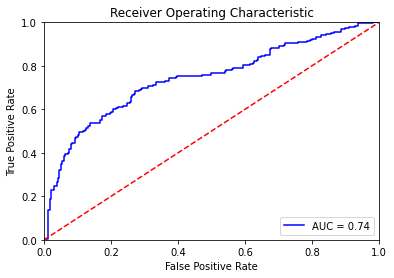

In [634]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
fpr, tpr, thresh = roc_curve(y_test,logistic.predict_proba(X_test)[:,1])
plt.title('Receiver Operating Characteristic')
auc = roc_auc_score(y_test,logistic.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, 'b', label = f'AUC = {auc.round(2)}')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### CASO 2

In [654]:
def run_logistic(X_train, X_test, y_train, y_test):

    # función para entrenar y evaluar desempeño de Regresión Logística
    logit=LogisticRegression(solver='liblinear',penalty='l2')
    logit.fit(X_train, y_train)

    print('Set Entrenamiento')
    pred = logit.predict_proba(X_train)
    print(
        'Logistic Regression roc-auc: {}'.format(roc_auc_score(y_train, pred[:, 1])))

    print('Set Prueba')
    pred = logit.predict_proba(X_test)
    print(
        'Logistic Regression roc-auc: {}'.format(roc_auc_score(y_test, pred[:, 1])))

In [655]:
run_logistic(X_train, X_test, y_train, y_test)

Set Entrenamiento
Logistic Regression roc-auc: 0.9454919785948672
Set Prueba
Logistic Regression roc-auc: 0.9373973836131562


In [656]:
#solver{‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default=’lbfgs’
logistic=LogisticRegression(solver='liblinear',penalty='l2')

In [657]:
logistic.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [658]:
metricas2(logistic,X_test,y_test)

 Roc Validate: 0.937
 Acc Validate: 0.899
 Matrix Conf Validate:  
 [[232   7]
 [ 41 196]]


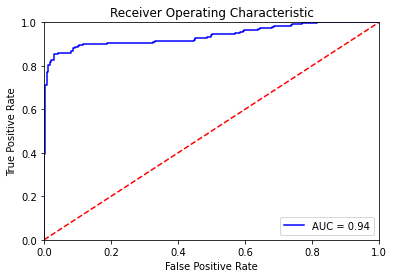

In [659]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
fpr, tpr, thresh = roc_curve(y_test,logistic.predict_proba(X_test)[:,1])
plt.title('Receiver Operating Characteristic')
auc = roc_auc_score(y_test,logistic.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, 'b', label = f'AUC = {auc.round(2)}')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### CASO 3

In [660]:
def run_logistic(X_train, X_test, y_train, y_test):

    # función para entrenar y evaluar desempeño de Regresión Logística
    logit=LogisticRegression(solver='liblinear',penalty='l1')
    logit.fit(X_train, y_train)

    print('Set Entrenamiento')
    pred = logit.predict_proba(X_train)
    print(
        'Logistic Regression roc-auc: {}'.format(roc_auc_score(y_train, pred[:, 1])))

    print('Set Prueba')
    pred = logit.predict_proba(X_test)
    print(
        'Logistic Regression roc-auc: {}'.format(roc_auc_score(y_test, pred[:, 1])))

In [661]:
run_logistic(X_train, X_test, y_train, y_test)

Set Entrenamiento
Logistic Regression roc-auc: 0.9935348550958621
Set Prueba
Logistic Regression roc-auc: 0.9936973677241672


In [662]:
#solver{‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default=’lbfgs’
logistic=LogisticRegression(solver='liblinear',penalty='l1')

In [663]:
logistic.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [664]:
from sklearn.metrics import roc_auc_score,accuracy_score,confusion_matrix

In [665]:
metricas2(logistic,X_test,y_test)

 Roc Validate: 0.994
 Acc Validate: 0.968
 Matrix Conf Validate:  
 [[236   3]
 [ 12 225]]


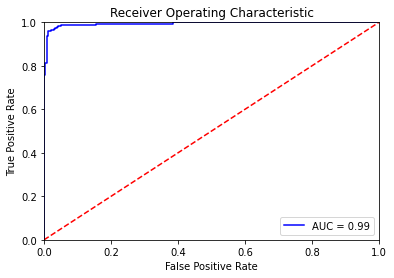

In [666]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
fpr, tpr, thresh = roc_curve(y_test,logistic.predict_proba(X_test)[:,1])
plt.title('Receiver Operating Characteristic')
auc = roc_auc_score(y_test,logistic.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, 'b', label = f'AUC = {auc.round(2)}')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()